###Homework 10

In this homework, you are going to use the code from TrafficSignsClassification notebook and create your own traffic sign classifier.

###Step 1

Use the data from data/subset_homework folder and visualize some examples. How many images are there for each class?

In [2]:
cd CV-HW/lesson_12-

/content/CV-HW/lesson_12


In [8]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

Count of images in class 0: 2220


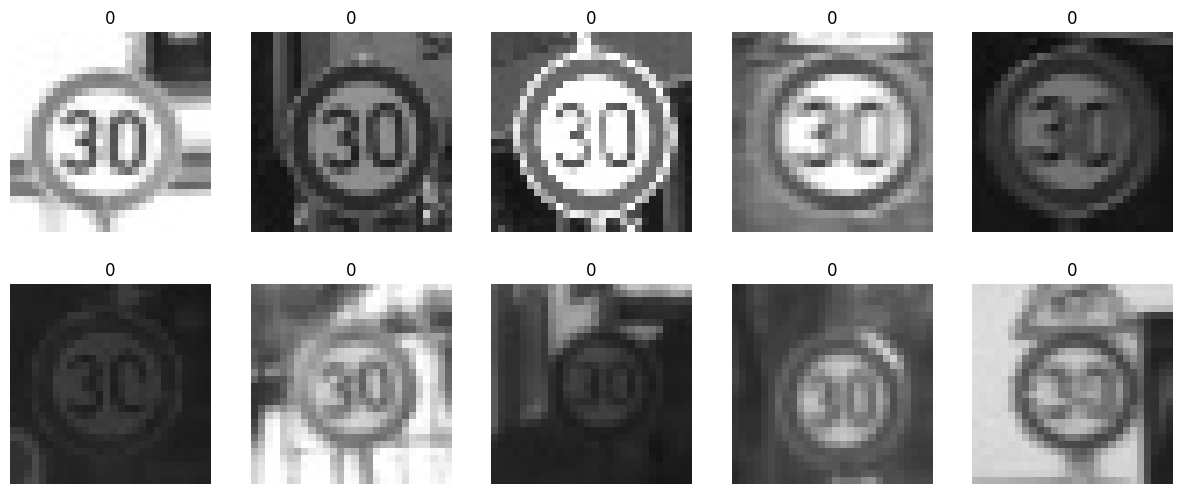

In [12]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)
print('Count of images in class 0:', len(images_0))

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

Count of images in class 1: 2250


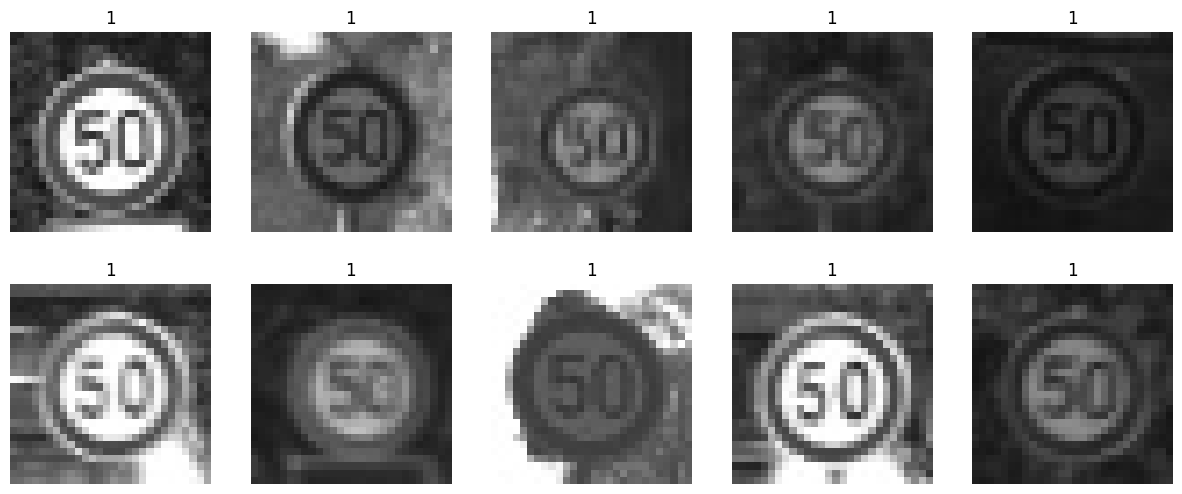

In [10]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)
print('Count of images in class 1:', len(images_1))

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

How many images are there for each class?

2220 for class 0

2250 for class 1



### Step 2

Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?



In [13]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [14]:
# "flatten" the images to a one dimensional vector of pixels
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.03464937210083008


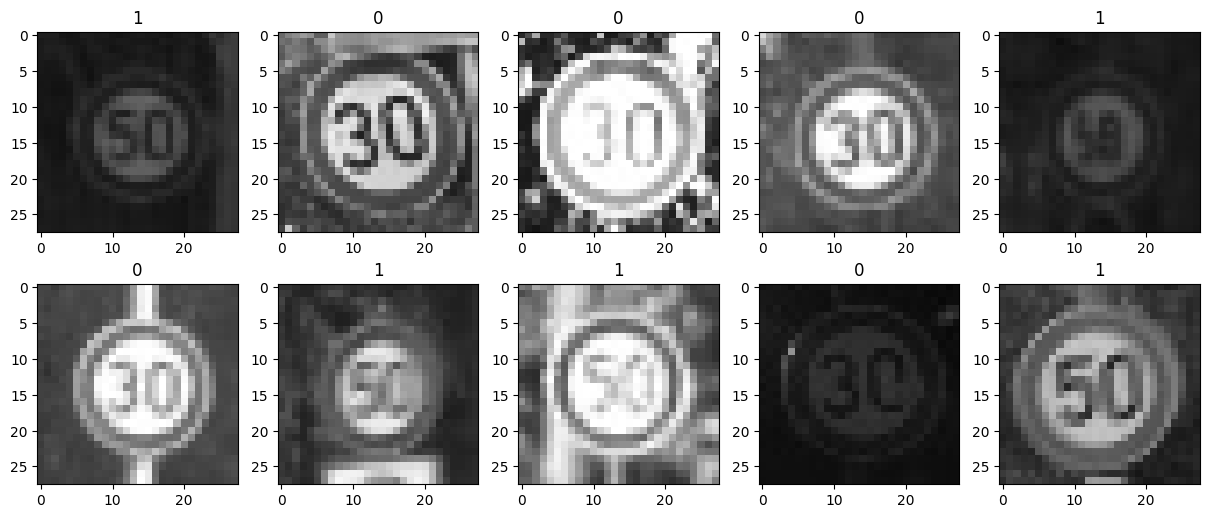

In [16]:
 # let's have a look at some random samples from our dataset.
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


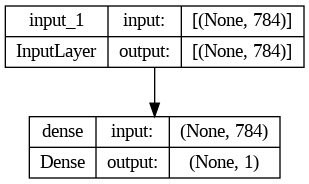

In [17]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

# only one single neuron
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)


In [19]:
# compile the model
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [20]:
# train model
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 1s 3ms/step - loss: 0.3636
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.2448
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.2012
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1735
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1503
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1349
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1246
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1188
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1080
Epoch 10/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1020


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

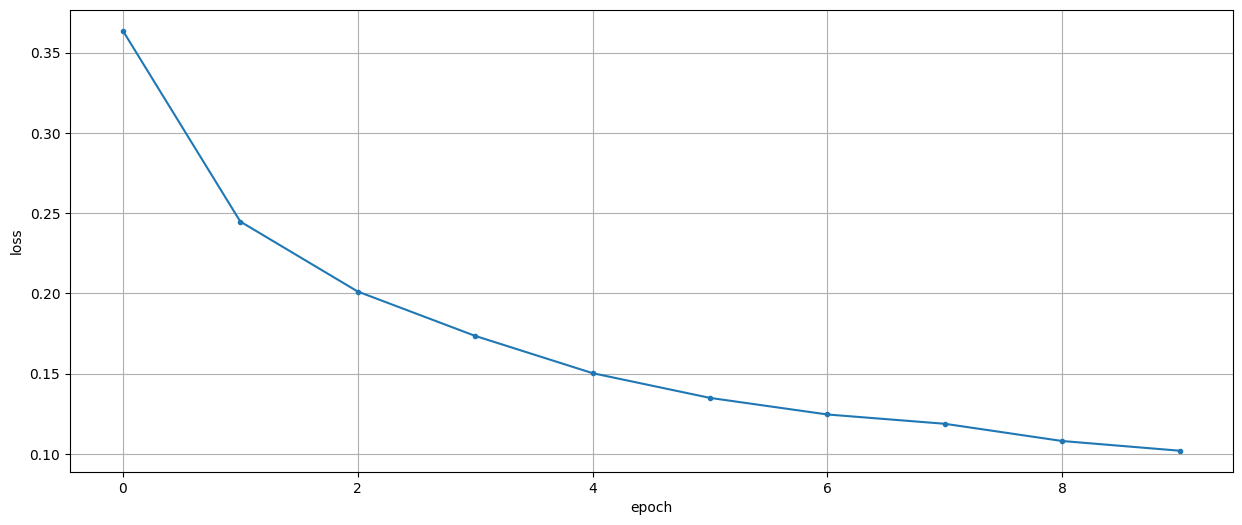

In [21]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.38846484] [0.38846484]


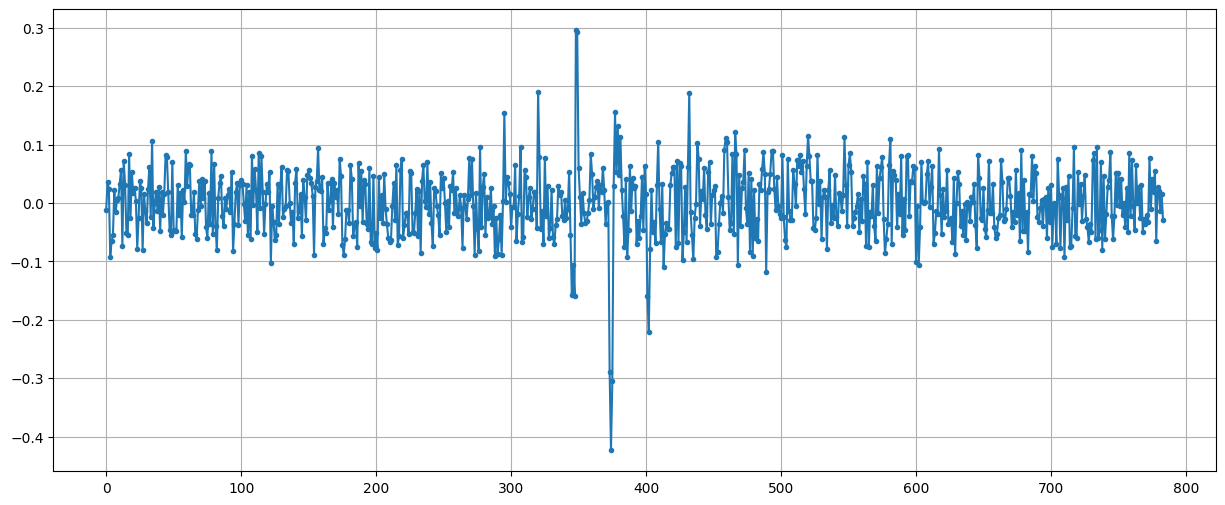

In [22]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

1/1 [==============================] - 0s 75ms/step
[[0.29951376]] 0
140/140 [==============================] - 0s 1ms/step
Accuracy 0.9125279642058165


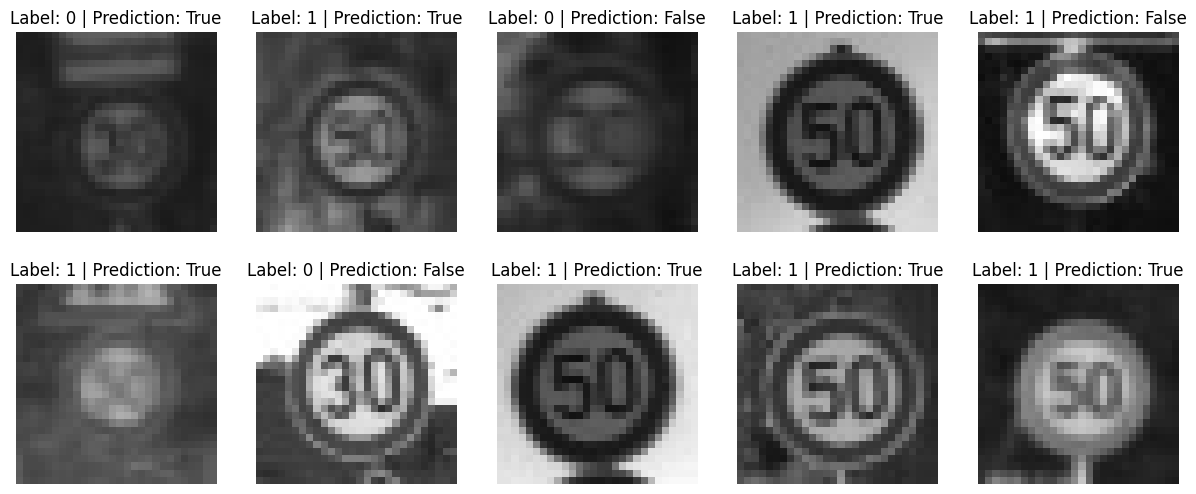

In [23]:
# Once our model is trained, we will can run it on our images to see how it performs (inference).
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

What accuracy can you achieve?


Accuracy 0.9125279642058165

### Step 3

Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achiev

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_46 (Dense)            (None, 150)               117750    
                                                                 
 dense_47 (Dense)            (None, 50)                7550      
                                                                 
 dense_48 (Dense)            (None, 1)                 51        
                                                                 
Total params: 125351 (489.65 KB)
Trainable params: 125351 (489.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


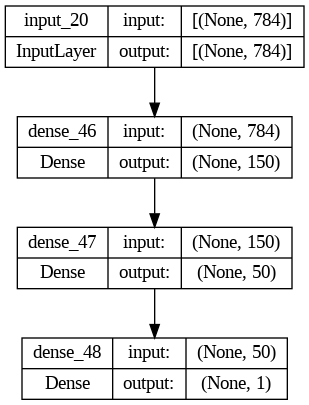

In [86]:
# more neurons, more layers
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(150, activation="relu")(inputs)
outputs = Dense(50, activation="relu")(outputs)
#outputs = Dense(10, activation="relu")(outputs)
outputs = Dense(1, activation="linear")(outputs)
model = Model(inputs, outputs)

model.summary()
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)




In [91]:
# compile the model
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# train model
history = model.fit(pixels, labels, epochs=100, batch_size=32)




Epoch 1/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0312
Epoch 2/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0240
Epoch 3/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0292
Epoch 4/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0182
Epoch 5/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0255
Epoch 6/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0255
Epoch 7/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0221
Epoch 8/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0232
Epoch 9/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0209
Epoch 10/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0218
Epoch 11/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0211
Epoch 12/100
140/140 [==============================] - 1s 6ms/step - loss: 0.0147
Epoch 13/100


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

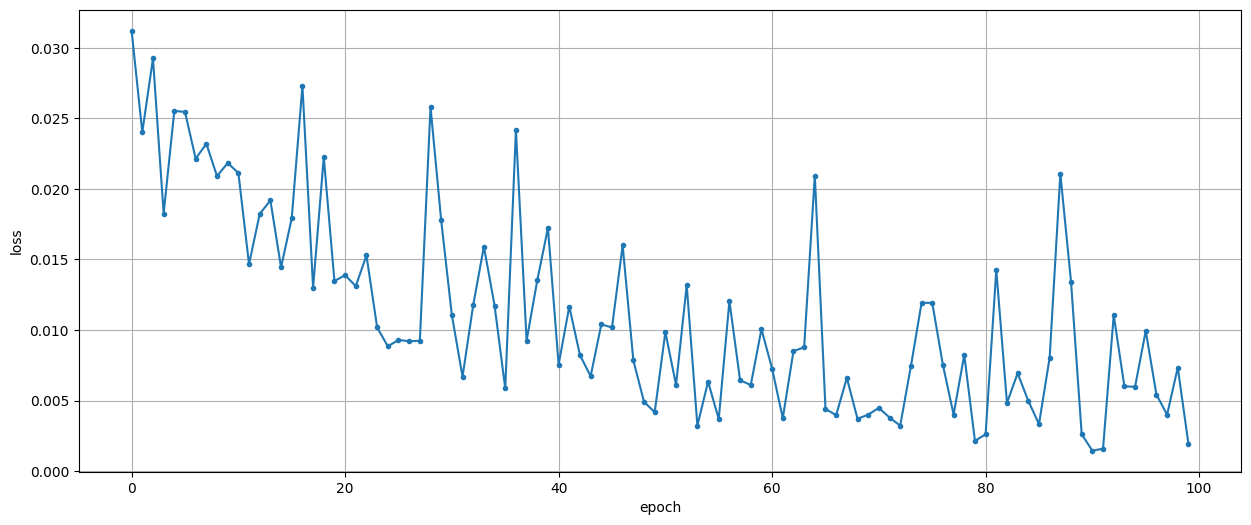

In [92]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')


1/1 [==============================] - 0s 73ms/step
[[0.00513875]] 0
140/140 [==============================] - 0s 2ms/step
Accuracy 0.9982102908277405


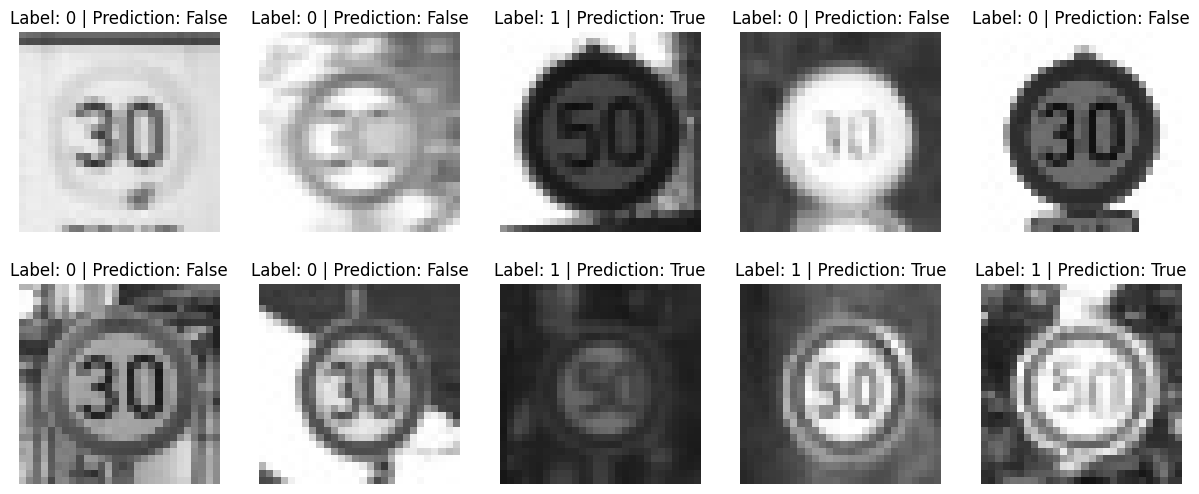

In [93]:
# Once our model is trained, we will can run it on our images to see how it performs (inference).
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

What is the maximum accuracy you can achive?

Max Accuracy 0.9982102908277405



